# Import the libraries

In [67]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

# Load the dataset


In [68]:
dataset=pd.read_csv("diabetes.csv")
dataset

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [70]:
dataset.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [71]:
dataset.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [72]:
dataset.tail()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1
767,93,70,31,0,30.4,0.315,23,0


In [73]:
dataset.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [74]:
data=dataset
data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [75]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

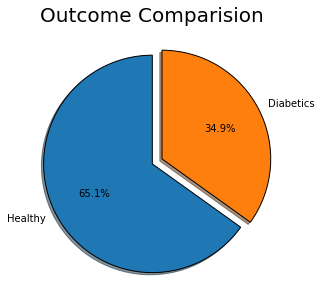

In [131]:
labels = ["Healthy","Diabetics"]
explode = [0, 0.1]
sizes = data.Outcome.value_counts().values

plt.figure(figsize= (5, 5))
plt.pie(sizes, explode= explode, labels= labels, autopct = "%1.1f%%",startangle=90, shadow=True, wedgeprops={'edgecolor':'black'})
plt.title("Outcome Comparision", fontsize = 20)
plt.show()

# Data Slicing

In [76]:
y = data["Outcome"]
X = data.drop(["Outcome"], axis=1)

In [112]:
X_scaled = StandardScaler().fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...
763,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [113]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Split the data into training & testing set

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [115]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [116]:
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

# Defining algorithm

In [117]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(x_train,y_train)

LogisticRegression()

# Predict the result

In [118]:
y_pred=regressor.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

# Calculate accuracy score

In [119]:
y_prob = regressor.predict_proba(X)[:, 1]
roc_auc_score(y, y_prob)
cv_results = cross_validate(regressor,
                            X,
                            y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [120]:
cv_results = cross_validate(regressor, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [121]:
cv_results['test_accuracy'].mean()

0.7760886172650878

In [122]:
cv_results['test_f1'].mean()

0.6399823125673223

In [123]:
cv_results['test_roc_auc'].mean()

0.826898672257163

In [129]:
def regression(X,y):
    x_train,x_test, y_train, y_test=train_test_split(X,y, test_size=0.3,random_state=42)
    regressor=LogisticRegression().fit(x_train,y_train)
    y_pred=regressor.predict(x_test)
    print(classification_report(y_test, y_pred))
    print("Accuracy Score  : ", accuracy_score(y_test,y_pred))
    print("Cross Val Score  : ",cross_val_score(regressor,x_test,y_test,cv=10).mean())
    print('Test Confusion Matrix:\n', confusion_matrix(y_test,y_pred))
    plot_confusion_matrix(regressor,x_test,y_test)
    plt.show()

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

Accuracy Score  :  0.7402597402597403
Cross Val Score  :  0.7230072463768116
Test Confusion Matrix:
 [[124  27]
 [ 33  47]]


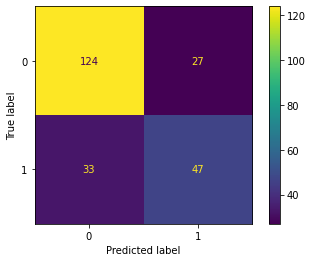

In [130]:
regression(X,y)